In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d #unsure if needed

# suppress scientific notation for now
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format
#%matplotlib notebook
# makes it way slower

# Changes
16/10/20 - changes I function to multiply A by dz

In [5]:
# define default coefficients
v= 0.25 # drift term
d= 10.0 # diffusion term
lbg=0.1 # Specific algal maintenance respiration losses
mumax=1.2
rhomax=0.2
qmax=0.04
qmin=0.004
m=1.5
h=120.0
r = 0.02

A_0 = 1000 # scales the hump
I0 = 300
kbg=0.4

zmax = 10.0 # meters
tmax = 10.0 # days
dz = 0.1
dt = dz**2/60 # temporary 
Nz = int(zmax/dz)
Nt = int(tmax/dt)

z_grid = np.arange(0,zmax,dz)
time_steps = np.arange(0,tmax,dt)

# to create an initial 'hump' shape 1/4 of the way down in the water
peak_location = zmax/4

def rnorm(mu,sigma,z):
    """create normal hump around mu over z, of std. dev. sigma"""
    return np.exp( -(z-mu)**2/(2*sigma**2) )/ np.sqrt(2*np.pi*sigma**2)


A = np.zeros((Nz,Nt)) # RESULTS MATRIX: rows: deeper z-values, cols: time steps forward
A[:,0] = A_0 * rnorm(peak_location,1,z_grid)

In [3]:
def next_step_A(z,A):
    """Calculates next step for A, input arrays of length zmax"""
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:] - A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:] - 2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * (- lbg*A[1:-1] - A_drift + A_diffusion )
    
    A_next[0] = d/(2*v*dz + 3*d)*( 4 * A_next[1] - A_next[2] )
    
    A_next[-1] = (- A_next[-3] + 4*A_next[-2] )/3 
    
    return A_next

In [6]:
# to use for plotting A over time
fractions = np.array([0,1,2,3,4,5])/5
steps = Nt*fractions
steps = steps.astype(int)
steps

array([    0, 11999, 23999, 35999, 47999, 59999])

# 1. Dynamics of A
## Drift Only
Hump drifts towards zmax. **Note:** for large v (v>1) or large tmax there are oscillations coming from zmax. Suggests there is a problem with the boundary condition at zmax. This behaviour disappears once diffusion is included.

original population: 9946.302521985794
final population: -11.227716622272716


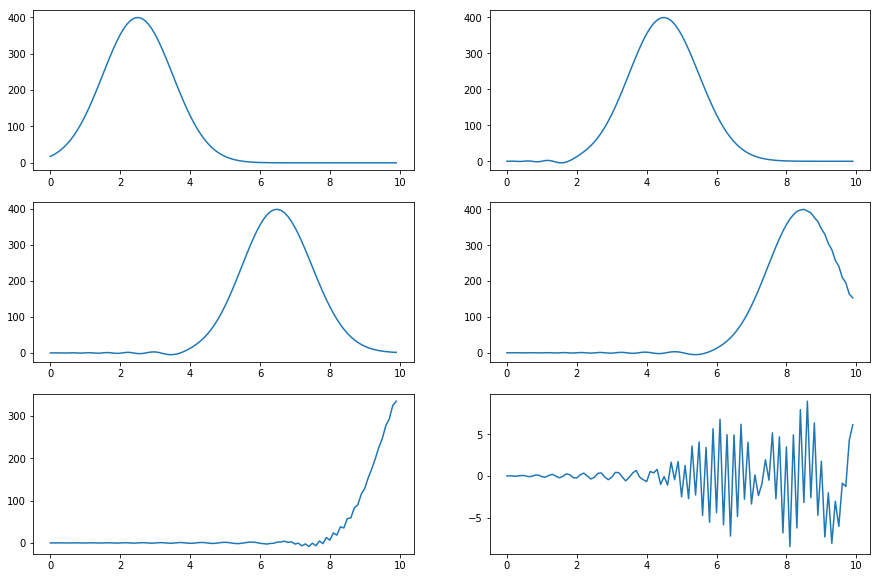

In [5]:
v= 1.0 # drift term, 0.25 is default value
d= 0.0 # 10.0 # diffusion term
lbg=0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1
    
fig, axs = plt.subplots(3,2, figsize=(15,10))


axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

Text(0.5, 0.92, 'A - Phytoplankton')

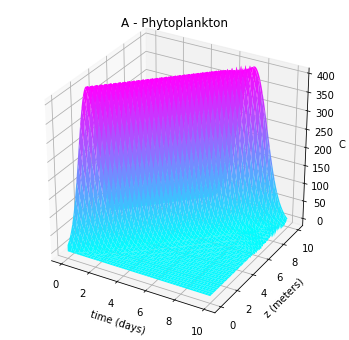

In [6]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

## Diffusion Only
Peak stays in same place but hump flattens out.

original population: 9946.302521985794
final population: 10040.234695278163


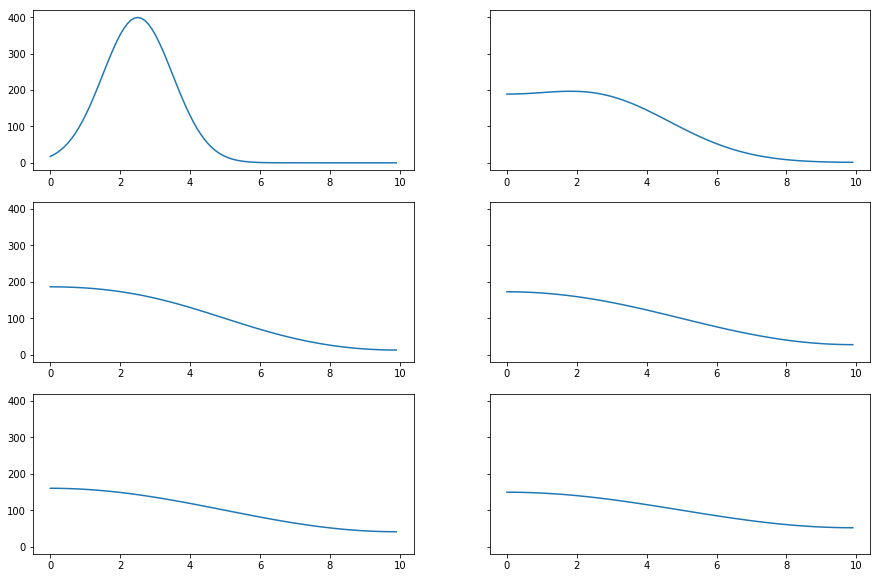

In [7]:
v= 0.0 # drift term
d= 1.0 # diffusion term
lbg = 0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

## Turn both drift and diffusion on
Hump flattens out and dirfts downwards

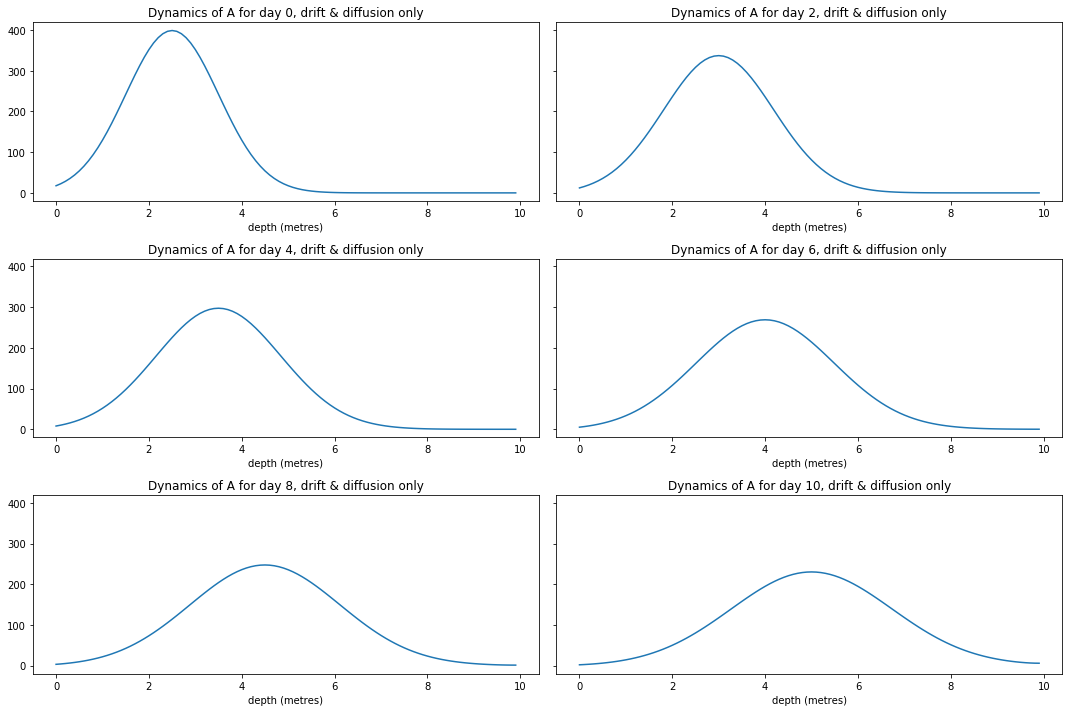

In [8]:
v= 0.25 # drift term
d= 0.1 # diffusion term
lbg = 0.0 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

axs[0,0].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[0])))
axs[0,1].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[1])))
axs[1,0].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[2])))
axs[1,1].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[3])))
axs[2,0].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[4])))
axs[2,1].set_title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[5])))

axs[0,0].set_xlabel('depth (metres)')
axs[0,1].set_xlabel('depth (metres)')
axs[1,0].set_xlabel('depth (metres)')
axs[1,1].set_xlabel('depth (metres)')
axs[2,0].set_xlabel('depth (metres)')
axs[2,1].set_xlabel('depth (metres)')

plt.tight_layout()

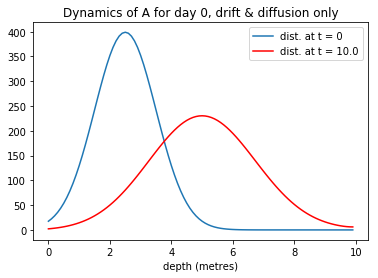

In [9]:
plt.plot(z_grid,A[:,steps[0]])
plt.title('Dynamics of A for day {}, drift & diffusion only'.format(int(10*fractions[0])))
plt.xlabel('depth (metres)')
plt.plot(z_grid,A[:,-1],color='red')
plt.legend(labels=('dist. at t = {}'.format(0), 'dist. at t = {}'.format(tmax)),loc='best')


Text(0.5, 0.92, 'A - Phytoplankton')

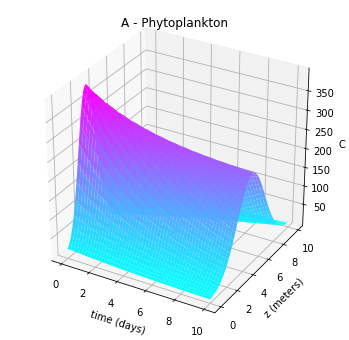

In [10]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

In [11]:
print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

original population: 9946.302521985794
final population: 9921.941100094027


Hump flattens out and system tends toward homogenous distribution over time thought there is ~867 less at the end (?)

## Turn on lbg term
Hump flattens out more quickly.

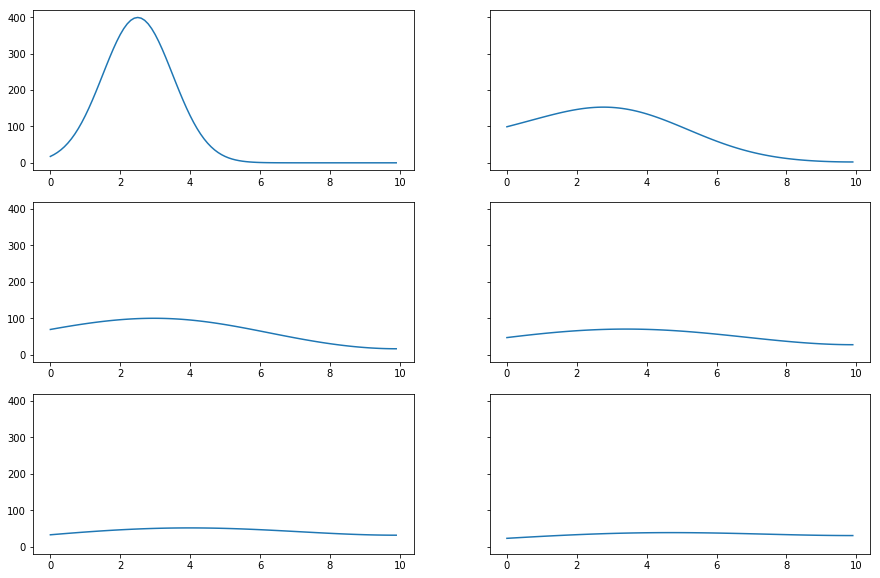

In [12]:
v= 0.25 # drift term
d= 1.0 # diffusion term
lbg = 0.1 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i] = next_step_A(z_grid,A[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

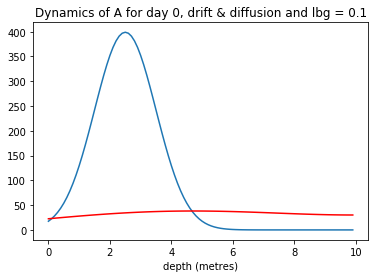

In [13]:
plt.plot(z_grid,A[:,steps[0]])
plt.title('Dynamics of A for day {}, drift & diffusion and lbg = {}'.format(int(10*fractions[0]),lbg))
plt.xlabel('depth (metres)')
plt.plot(z_grid,A[:,-1],color='red')


Text(0.5, 0.92, 'A - Phytoplankton')

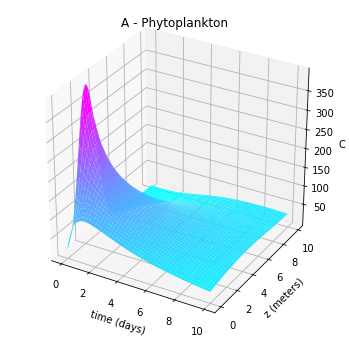

In [14]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Phytoplankton')

In [15]:
print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

original population: 9946.302521985794
final population: 3340.0700756668184


You can see the system flattens/dies out faster than in the solution without lbg and the overall amount of phytonplankton significantly decreases.

## 2. Plotting light

Text(0.5, 0, 'z')

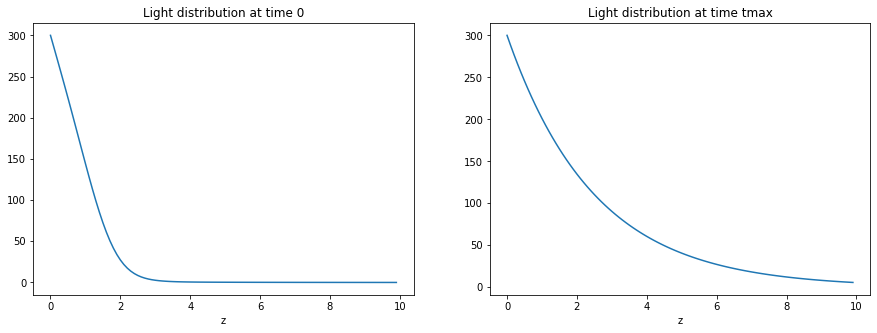

In [7]:
def I(z,A,I_0=I0,k = 0.0003):
    """Function to plot I using array A[:,i], default k=0.0003, larger values of k make effect of A on I more apparent"""
    integral = np.zeros(len(z))
    integral[1:] = k*np.cumsum(A[1:])*dz 
    return I_0 * np.exp( -integral - kbg*z)

fig, axs = plt.subplots(1,2,figsize = (15,5))
II = I(z_grid,A[:,0],I0,0.005) # larger k-value to show effect of A
axs[0].plot(z_grid, II)
axs[0].set_title('Light distribution at time 0')
axs[0].set_xlabel('z')

II = I(z_grid,A[:,-1],I0,0.005) # larger k-value to show effect of A
axs[1].plot(z_grid, II)
axs[1].set_title('Light distribution at time tmax')
axs[1].set_xlabel('z')

## 3. Doing same for Rb
Took turns turning v,d and lbg off in the same cell here.

In [17]:
def next_step_A_Rb(z,A, Rb):
    """Calculates next step for input arrays of length zmax"""
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:]-A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:]-2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( -lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = 0 #(4*A_next[-2] - A_next[-3])/3
    
    Rb_next = np.zeros(len(Rb))
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    
    Rb_next[1:-1] = Rb[1:-1] + dt * ( -lbg*Rb[1:-1] - Rb_drift + Rb_diffusion  ) 
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = 0 #(4*Rb_next[-2] - Rb_next[-3])/3 
    
    return A_next, Rb_next

In [8]:
# define default coefficients
Rb_0 = 80 # scales the hump

# to create an initial 'hump' shape 1/4 of the way down in the water
peak_location = zmax/4.0

Rb = np.zeros((Nz,Nt)) # RESULTS MATRIX rows: deeper z-values, cols: time steps forward
Rb[:,0] = Rb_0 * rnorm(peak_location,1,z_grid)

original population: 795.7042017588641
final population: 3.0696126205148246


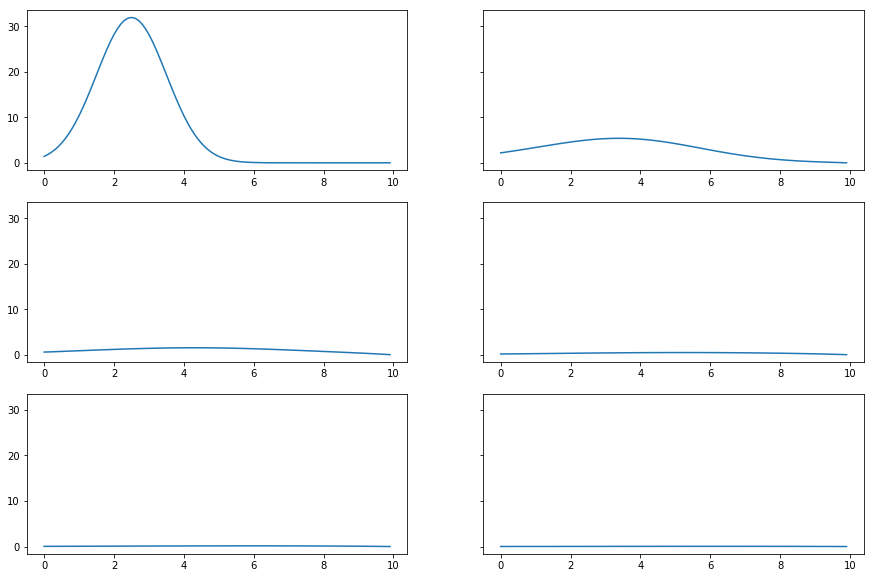

In [28]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rb[:,steps[0]])
axs[0,1].plot(z_grid,Rb[:,steps[1]])
axs[1,0].plot(z_grid,Rb[:,steps[2]])
axs[1,1].plot(z_grid,Rb[:,steps[3]])
axs[2,0].plot(z_grid,Rb[:,steps[4]])
axs[2,1].plot(z_grid,Rb[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rb[:,0]),sum(Rb[:,-1])))

In [19]:
print("original population: {}\nfinal population: {}".format(sum(Rb[:,0]),sum(Rb[:,-1])))

original population: 795.7042017588641
final population: 0.0


original population: 9946.302521985794
final population: 3340.0700756668184


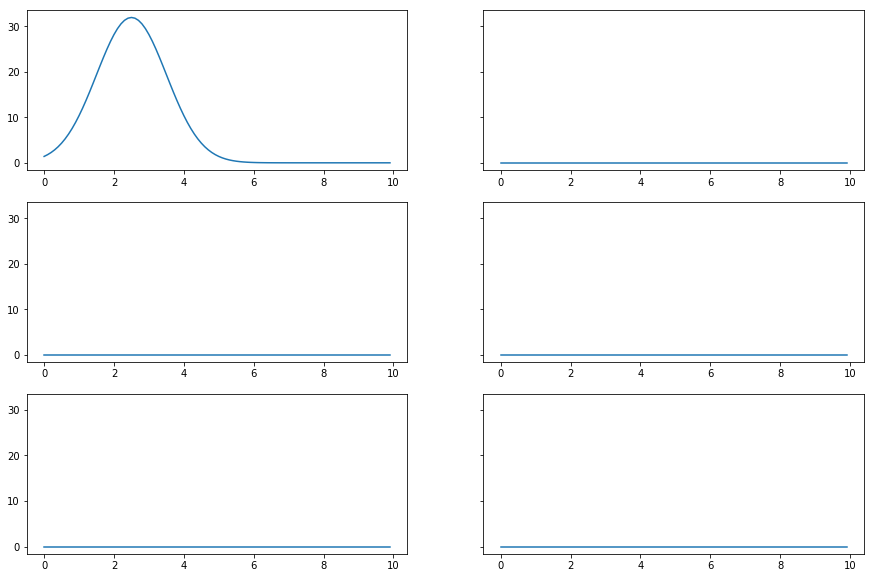

In [20]:
fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rb[:,steps[0]])
axs[0,1].plot(z_grid,Rb[:,steps[1]])
axs[1,0].plot(z_grid,Rb[:,steps[2]])
axs[1,1].plot(z_grid,Rb[:,steps[3]])
axs[2,0].plot(z_grid,Rb[:,steps[4]])
axs[2,1].plot(z_grid,Rb[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

Text(0.5, 0.92, 'Rb - Bound Nutrients')

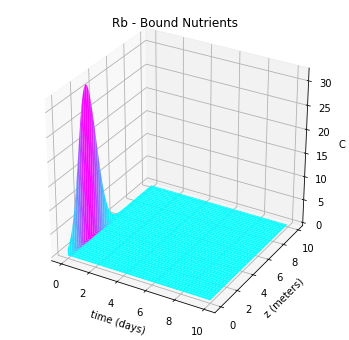

In [21]:
T,Z = np.meshgrid(time_steps[:-1],z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rb,cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rb - Bound Nutrients')

## 4. Bringing in p function

    def I(z,A,I_0=I0,k = 0.0003):
        integral = np.zeros(len(z))
        integral[1:] = k*A[1:]
        return I_0 * np.exp( -integral - kbg*z)

    II = I(z_grid,A[:,0],I0,0.005)

In [9]:
def p(I,q):
    return mumax * (1.0 - qmin/q) * (I/(h + I))

def next_step_A_Rb(z, A, Rb,p_switch=1):
    """Calculates next step for input arrays of length zmax"""
    
    II = I(z,A)
    q = Rb[1:-1]/A[1:-1]
    pp = p(II[1:-1],q) * p_switch
    
    A_next = np.zeros(len(A))
    A_drift = v * (A[2:] - A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:] - 2*A[1:-1] + A[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( pp*A[1:-1] - lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
    
    Rb_next = np.zeros(len(Rb))
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    
    Rb_next[1:-1] = Rb[1:-1] - dt*lbg*Rb[1:-1] - dt*Rb_drift + dt*Rb_diffusion
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3 
    
    
    return A_next, Rb_next

original population: 9946.302521985794
final population: 31371.77351241338


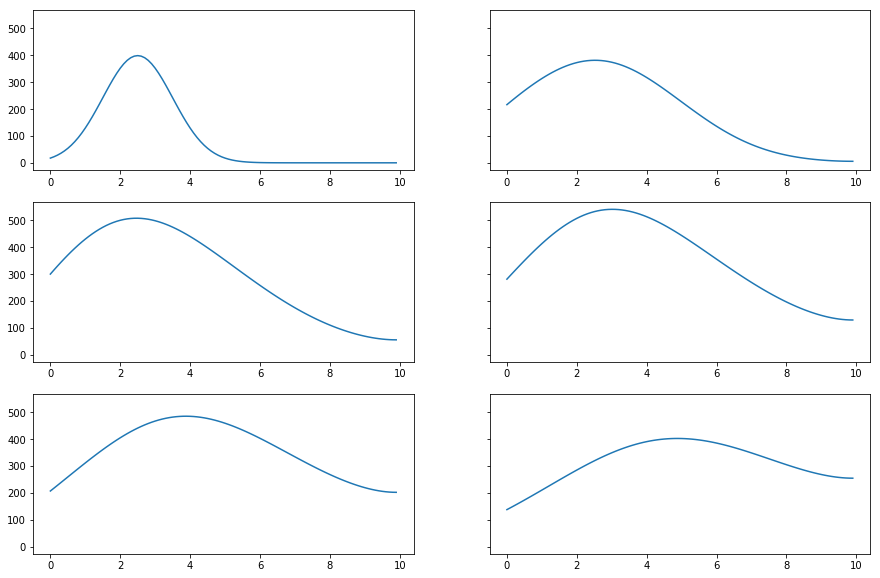

In [23]:
v = 0.5 # drift term
d = 1.0 # diffusion term
lbg = 0.1 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

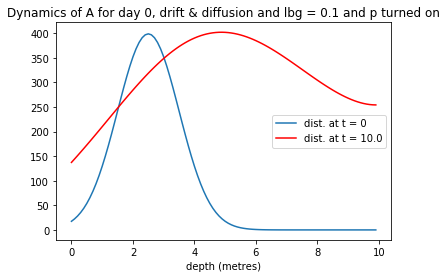

In [24]:
plt.plot(z_grid,A[:,steps[0]])
plt.title('Dynamics of A for day {}, drift & diffusion and lbg = {} and p turned on'.format(int(10*fractions[0]),lbg))
plt.xlabel('depth (metres)')
plt.plot(z_grid,A[:,-1],color='red')
plt.legend(labels=('dist. at t = {}'.format(0), 'dist. at t = {}'.format(tmax)),loc='best')

Significant decrease in population.

### To compare to when p is turned off:
Solution decays faster without p function

original population: 9946.302521985794
final population: 38.37015775643548


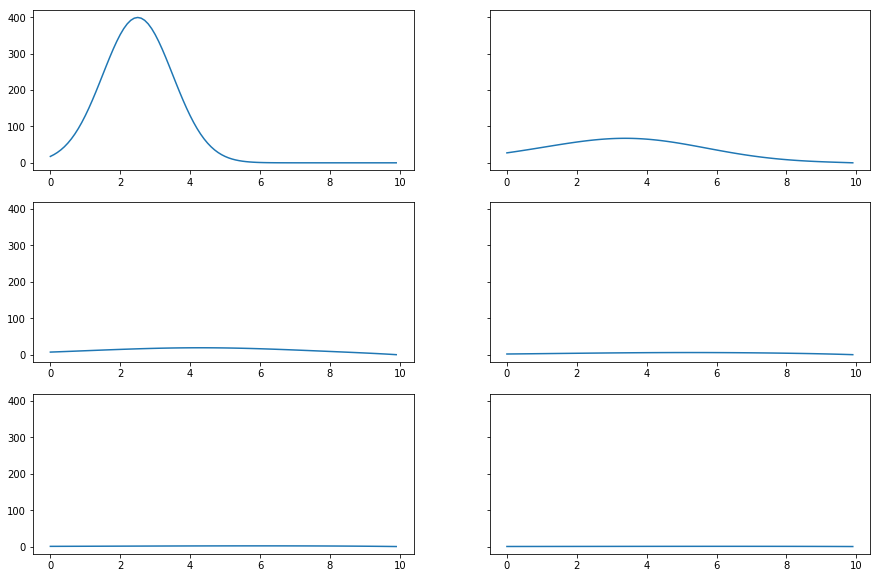

In [33]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rb[:,i] = next_step_A_Rb(z_grid,A[:,i-1],Rb[:,i-1], p_switch = 0.0)
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

## 5. Rd on it's own, then BC at bottom check, and coupling with Rb

In [14]:
# define default coefficients
Rd_0 = 40 # scales the hump

# to create an initial 'hump' shape 1/4 of the way down in the water
peak_location = zmax/4.0

Rd = np.zeros((Nz,Nt)) # RESULTS MATRIX, rows: deeper z-values, cols: time steps forward
Rd[:,0] = Rd_0 * rnorm(peak_location,1,z_grid)

In [10]:
def next_step_Rd(z,Rd):
    """Calculates next step for input arrays of length zmax"""
    
    Rd_next = np.zeros(len(Rd))
    Rd_diffusion = d * (Rd[2:]-2*Rd[1:-1] + Rd[:-2]) / (dz**2)
    
    Rd_next[1:-1] = Rd[1:-1] + dt*Rd_diffusion 
    Rd_next[0] = (4*Rd_next[1] - Rd_next[2])/3 
    Rd_next[-1] = ( 4*d*Rd_next[-1] - d*Rd_next[-2] ) / (3*d) # + v*dz*Rb_next[-1]*0 ) / (3*d)
    
    return Rd_next

original population: 397.85210087943204
final population: 354.9061785162374


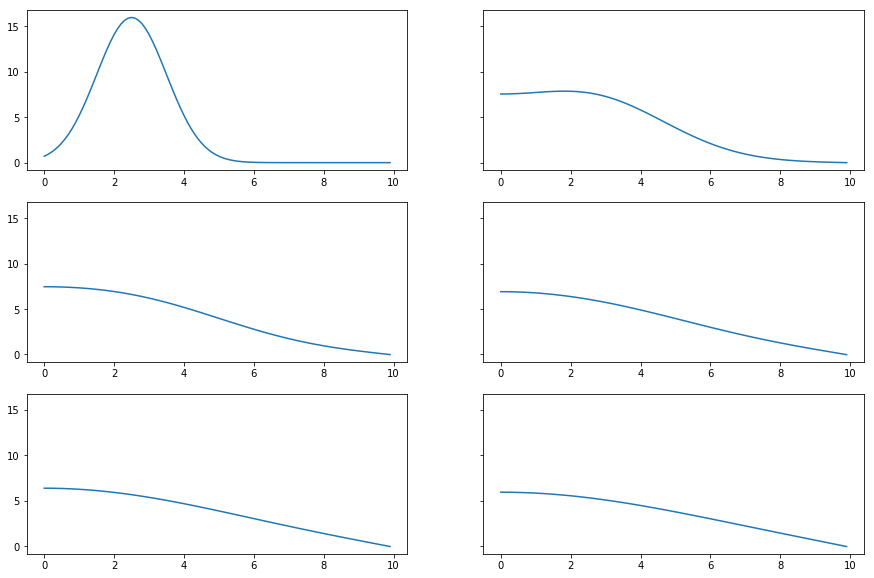

In [42]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    Rd[:,i] = next_step_Rd(z_grid,Rd[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rd[:,steps[0]])
axs[0,1].plot(z_grid,Rd[:,steps[1]])
axs[1,0].plot(z_grid,Rd[:,steps[2]])
axs[1,1].plot(z_grid,Rd[:,steps[3]])
axs[2,0].plot(z_grid,Rd[:,steps[4]])
axs[2,1].plot(z_grid,Rd[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rd[:,0]),sum(Rd[:,-1])))

## 5.b Just Rb and Rd now

In [43]:
def next_step_Rd_Rb(z,Rd, Rb):
    """Calculates next step for input arrays of length zmax"""
    
    Rb_next = np.zeros(len(Rb))
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    
    Rd_next = np.zeros(len(Rd))
    Rd_diffusion = d * (Rd[2:]-2*Rd[1:-1] + Rd[:-2]) / (dz**2)
    
    Rb_next[1:-1] = Rb[1:-1] - dt*lbg*Rb[1:-1] - dt*Rb_drift + dt*Rb_diffusion
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
    
    Rd_next[1:-1] = Rd[1:-1] + dt*(lbg*Rb[1:-1] + Rd_diffusion)
    Rd_next[0] = (4*Rd_next[1] - Rd_next[2])/3 
    Rd_next[-1] = ( 4*d*Rd_next[-1] - d*Rd_next[-2] + v*dz*Rb_next[-1] ) / (3*d)
    
    return Rd_next, Rb_next

original population: 1193.5563026382963
final population: 1812.1937600776607


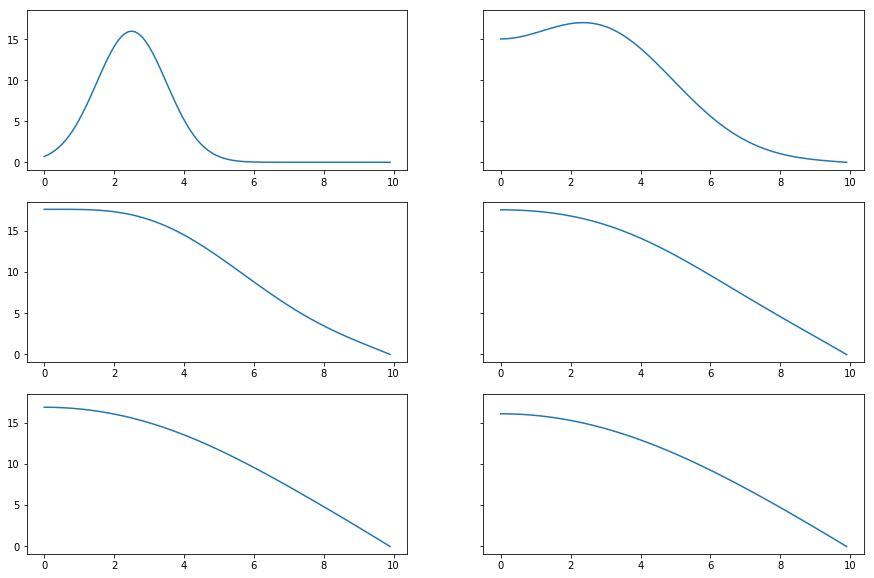

In [44]:
v= 0.5 # drift term
d= 1.0 # diffusion term
lbg = 0.5 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    Rd[:,i],Rb[:,i] = next_step_Rd_Rb(z_grid,Rd[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rd[:,steps[0]])
axs[0,1].plot(z_grid,Rd[:,steps[1]])
axs[1,0].plot(z_grid,Rd[:,steps[2]])
axs[1,1].plot(z_grid,Rd[:,steps[3]])
axs[2,0].plot(z_grid,Rd[:,steps[4]])
axs[2,1].plot(z_grid,Rd[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rd[:,0]+Rb[:,0]),sum(Rd[:,-1]+Rb[:,0])))

## 6. Rho function nonzero

In [11]:
def rho(q, Rd):
    return rhomax * (qmax-q)/(qmax-qmin) * ( Rd/(m + Rd) )

In [46]:
def next_step(z,A, Rd, Rb):
    """Calculates next step for input arrays of length zmax"""
    
    II = I(z,A)
    q = Rb[1:-1]/A[1:-1]
    pp = p(II[1:-1],q)
    rrho = rho(q,Rd[1:-1])
    
    A_next = np.zeros(len(A))
    Rb_next = np.zeros(len(Rb))
    Rd_next = np.zeros(len(Rd))
    
    A_drift = v * (A[2:]-A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:]-2*A[1:-1] + A[:-2]) / (dz**2)
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    Rd_diffusion = d * (Rd[2:]-2*Rd[1:-1] + Rd[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( pp*A[1:-1] -lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
    
    Rb_next[1:-1] = Rb[1:-1] + dt * (rrho*A[1:-1] -lbg*Rb[1:-1] - Rb_drift + Rb_diffusion )
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
    
    Rd_next[1:-1] = Rd[1:-1] + dt*(lbg*Rb[1:-1] -rrho*A[1:-1] + Rd_diffusion)
    Rd_next[0] = (4*Rd_next[1] - Rd_next[2])/3 
    Rd_next[-1] = ( 4*d*Rd_next[-1] - d*Rd_next[-2] + v*dz*Rb_next[-1] ) / (3*d)
    
    return A_next, Rd_next, Rb_next

original population: 397.85210087943204
final population: 25.387360562536095


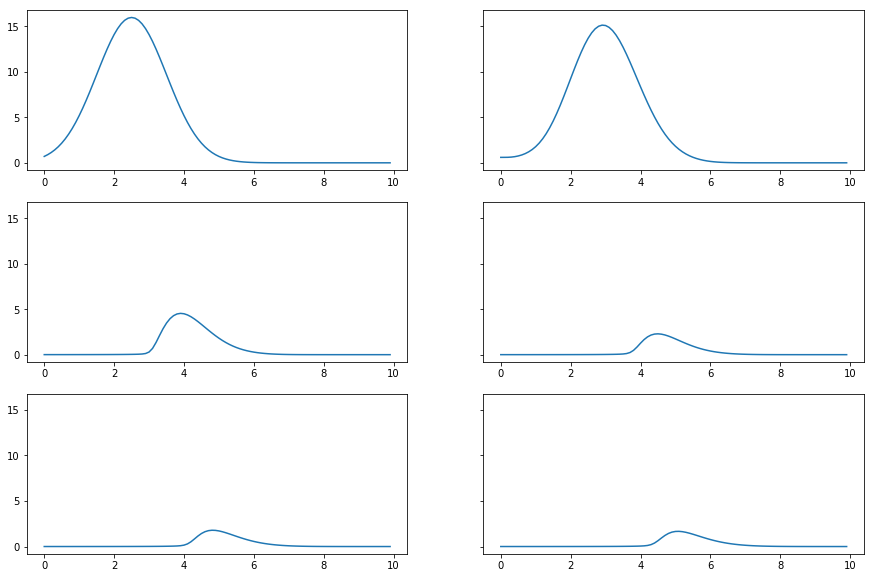

In [47]:
v= 0.05 # drift term
d= 0.05 # diffusion term
lbg = 0.05 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rd[:,i],Rb[:,i] = next_step(z_grid,A[:,i-1],Rd[:,i-1],Rb[:,i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rd[:,steps[0]])
axs[0,1].plot(z_grid,Rd[:,steps[1]])
axs[1,0].plot(z_grid,Rd[:,steps[2]])
axs[1,1].plot(z_grid,Rd[:,steps[3]])
axs[2,0].plot(z_grid,Rd[:,steps[4]])
axs[2,1].plot(z_grid,Rd[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rd[:,0]),sum(Rd[:,-1])))

original population: 9946.302521985794
final population: 100195.29297894199


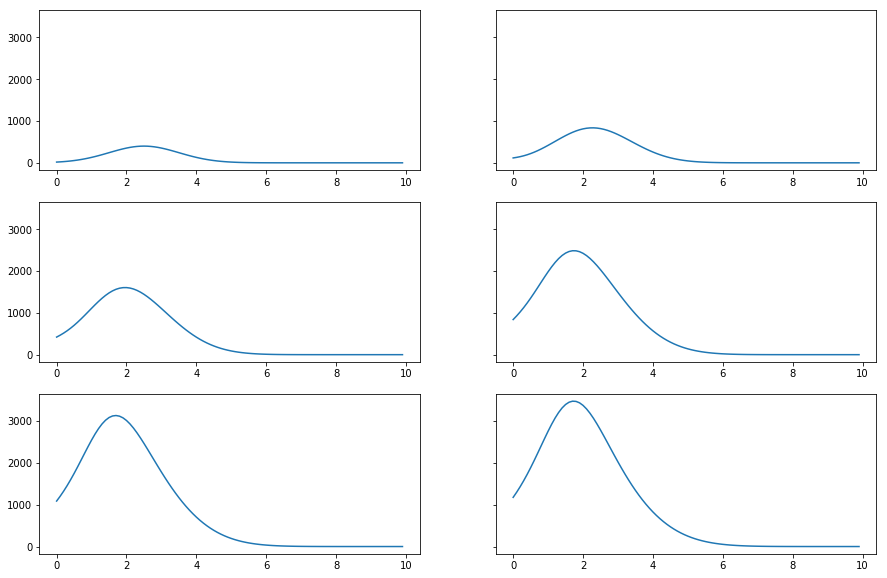

In [48]:
fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,A[:,steps[0]])
axs[0,1].plot(z_grid,A[:,steps[1]])
axs[1,0].plot(z_grid,A[:,steps[2]])
axs[1,1].plot(z_grid,A[:,steps[3]])
axs[2,0].plot(z_grid,A[:,steps[4]])
axs[2,1].plot(z_grid,A[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(A[:,0]),sum(A[:,-1])))

[link to some results for zmax=10](https://docs.google.com/document/d/1POVHeioH5Hxn5Z6kMn3Pn7SVLBypnAmwy5iTJadKIxo/edit?usp=sharing)

# Need to include Rs

In [12]:
Rs_0 = 0

Rs = np.zeros(Nt) # RESULTS ARRAY
Rs[0] = Rs_0

In [50]:
def next_step(z,A, Rd, Rb, Rs):
    """Calculates next step for input arrays of length zmax"""
    
    II = I(z,A)
    q = Rb[1:-1]/A[1:-1]
    pp = p(II[1:-1],q)
    rrho = rho(q,Rd[1:-1])
    
    A_next = np.zeros(len(A))
    Rb_next = np.zeros(len(Rb))
    Rd_next = np.zeros(len(Rd))
    
    A_drift = v * (A[2:]-A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:]-2*A[1:-1] + A[:-2]) / (dz**2)
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    Rd_diffusion = d * (Rd[2:]-2*Rd[1:-1] + Rd[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( pp*A[1:-1] -lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
    
    Rb_next[1:-1] = Rb[1:-1] + dt * (rrho*A[1:-1] -lbg*Rb[1:-1] - Rb_drift + Rb_diffusion )
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
    
    Rd_next[1:-1] = Rd[1:-1] + dt*(lbg*Rb[1:-1] -rrho*A[1:-1] + Rd_diffusion)
    Rd_next[0] = (4*Rd_next[1] - Rd_next[2])/3 
    Rd_next[-1] = ( 4*d*Rd_next[-1] - d*Rd_next[-2] + v*dz*Rb_next[-1] ) / (3*d)
    
    Rs_next = Rs + dt*(v*Rb[-1] - r*Rs)
    
    return A_next, Rd_next, Rb_next, Rs_next

original population: 397.85210087943204
final population: 25.387360562536095


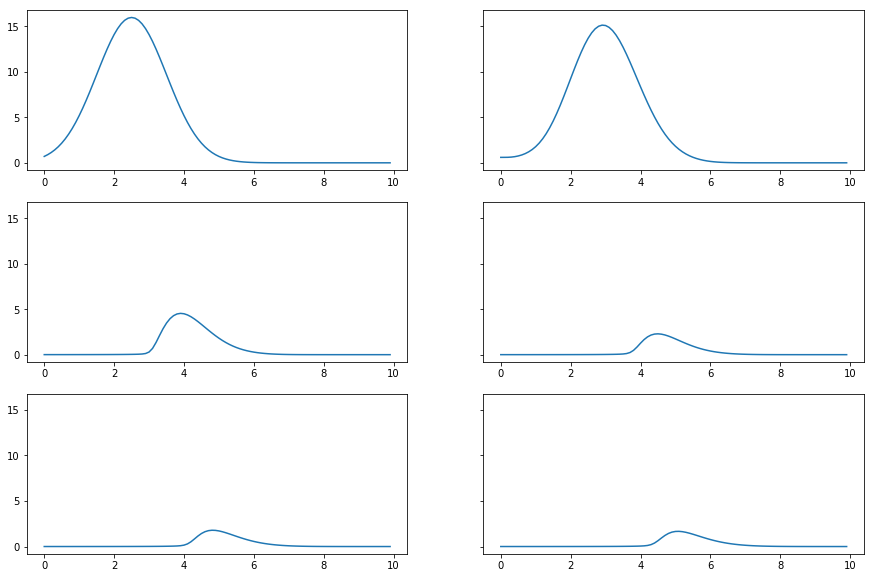

In [51]:
v= 0.05 # drift term
d= 0.05 # diffusion term
lbg = 0.05 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rd[:,i],Rb[:,i],Rs[i] = next_step(z_grid,A[:,i-1],Rd[:,i-1],Rb[:,i-1],Rs[i-1])
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rd[:,steps[0]])
axs[0,1].plot(z_grid,Rd[:,steps[1]])
axs[1,0].plot(z_grid,Rd[:,steps[2]])
axs[1,1].plot(z_grid,Rd[:,steps[3]])
axs[2,0].plot(z_grid,Rd[:,steps[4]])
axs[2,1].plot(z_grid,Rd[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rd[:,0]),sum(Rd[:,-1])))

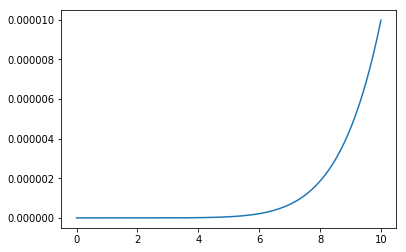

In [52]:
plt.plot(time_steps[:-1],Rs)

Text(0.5, 0.92, 'A - Bound Nutrients')

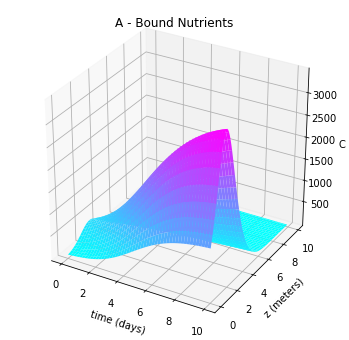

In [53]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Bound Nutrients')

Text(0.5, 0.92, 'Rd - Bound Nutrients')

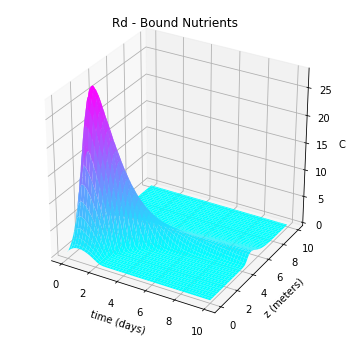

In [54]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rd, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rd - Bound Nutrients')

Text(0.5, 0.92, 'Rb - Bound Nutrients')

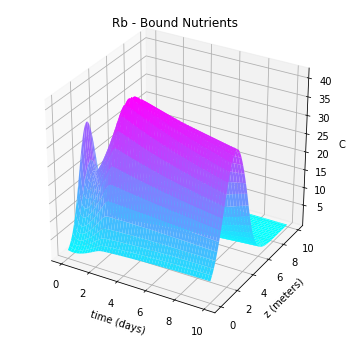

In [55]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rb, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rb - Bound Nutrients')

## Adding Rs to the Model

In [2]:
def next_step(z, A, Rb, Rd, Rs, dz, dt, d):
    """Calculates next step for input arrays of length zmax"""
    
    II = I(z,A)
    q = Rb[1:-1]/A[1:-1]
    pp = p(II[1:-1],q)
    rrho = rho(q,Rd[1:-1])
    
    A_next = np.zeros(len(A))
    Rb_next = np.zeros(len(Rb))
    Rd_next = np.zeros(len(Rd))
    
    A_drift = v * (A[2:]-A[:-2]) / (2*dz)
    A_diffusion = d * (A[2:]-2*A[1:-1] + A[:-2]) / (dz**2)
    Rb_drift = v * (Rb[2:]-Rb[:-2]) / (2*dz)
    Rb_diffusion = d * (Rb[2:]-2*Rb[1:-1] + Rb[:-2]) / (dz**2)
    Rd_diffusion = d * (Rd[2:]-2*Rd[1:-1] + Rd[:-2]) / (dz**2)
    
    A_next[1:-1] = A[1:-1] + dt * ( pp*A[1:-1] -lbg*A[1:-1] - A_drift + A_diffusion )
    A_next[0] = 4*d/(2*v*dz + 3*d)*A_next[1] - d/(2*v*dz + 3*d)*A_next[2] 
    A_next[-1] = (4*A_next[-2] - A_next[-3])/3
    
    Rb_next[1:-1] = Rb[1:-1] + dt * (rrho*A[1:-1] -lbg*Rb[1:-1] - Rb_drift + Rb_diffusion )
    Rb_next[0] = 4*d/(2*v*dz + 3*d)*Rb_next[1] - d/(2*v*dz + 3*d)*Rb_next[2] 
    Rb_next[-1] = (4*Rb_next[-2] - Rb_next[-3])/3
    
    Rs_next = Rs + dt*(v*Rb[-1] - r*Rs)
    
    Rd_next[1:-1] = Rd[1:-1] + dt*(lbg*Rb[1:-1] -rrho*A[1:-1] + Rd_diffusion)
    Rd_next[0] = (4*Rd_next[1] - Rd_next[2])/3 
    Rd_next[-1] = (2*r*dz*Rs_next + 4*d*Rd_next[-2] - d*Rd_next[-3])/(3*d)
    
    
    return A_next, Rb_next, Rd_next, Rs_next

original population: 397.85210087943204
final population: 1145.733433795874


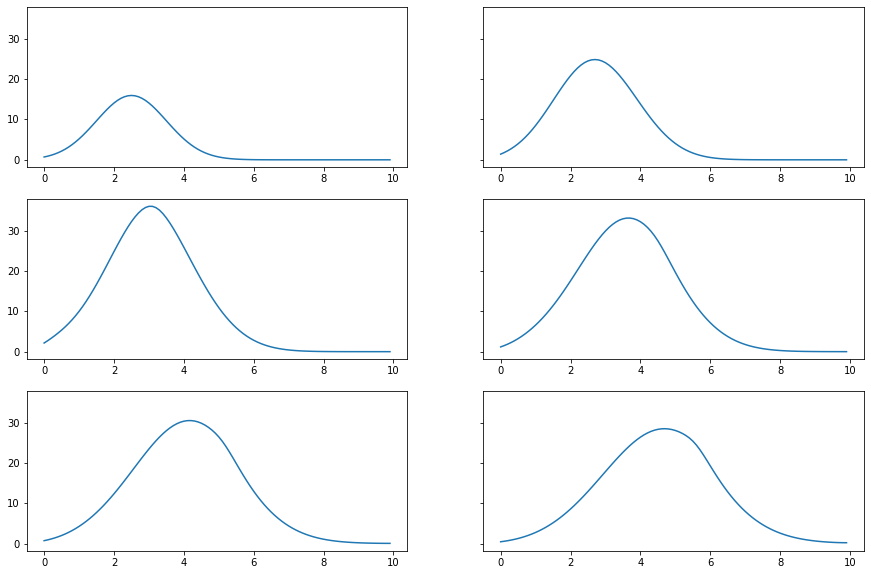

In [19]:
v= 0.25 # drift term
d= 0.1 # diffusion term
lbg = 0.1 # Specific algal maintenance respiration losses

i = 1
for t in time_steps[:-2]:
    A[:,i],Rd[:,i],Rb[:,i],Rs[i] = next_step(z_grid,A[:,i-1],Rd[:,i-1],Rb[:,i-1],Rs[i-1],dz=dz,dt=dt,d=d)
    i = i+1

fig, axs = plt.subplots(3,2, figsize=(15,10), sharey=True)

axs[0,0].plot(z_grid,Rd[:,steps[0]])
axs[0,1].plot(z_grid,Rd[:,steps[1]])
axs[1,0].plot(z_grid,Rd[:,steps[2]])
axs[1,1].plot(z_grid,Rd[:,steps[3]])
axs[2,0].plot(z_grid,Rd[:,steps[4]])
axs[2,1].plot(z_grid,Rd[:,steps[5]-1])

print("original population: {}\nfinal population: {}".format(sum(Rd[:,0]),sum(Rd[:,-1])))

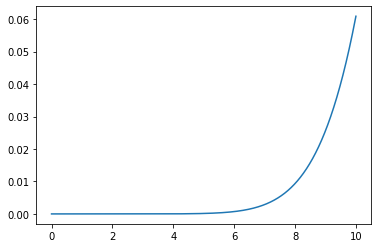

In [20]:
plt.plot(time_steps[:-1],Rs)

Text(0.5, 0.92, 'A - Bound Nutrients')

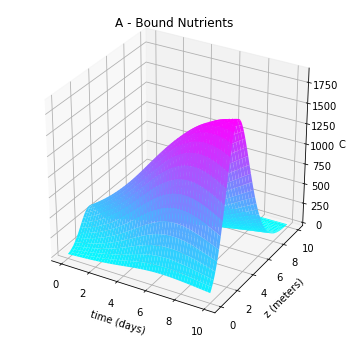

In [21]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, A, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - Bound Nutrients')

Text(0.5, 0.92, 'Rb - Bound Nutrients')

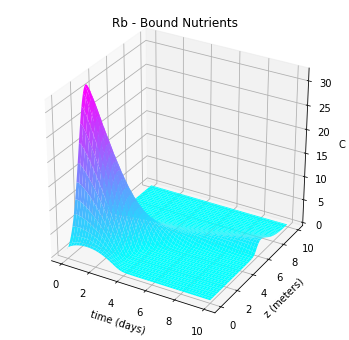

In [22]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rb, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rb - Bound Nutrients')

Text(0.5, 0.92, 'Rd - Bound Nutrients')

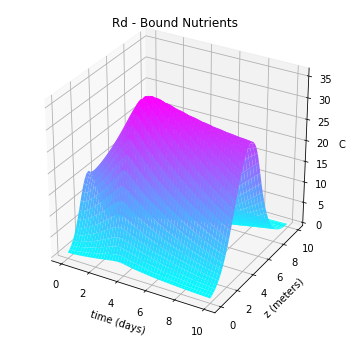

In [23]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, Rd, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('Rd - Bound Nutrients')

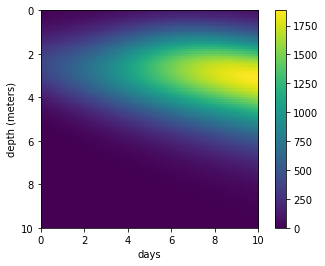

In [24]:
# Heatmap
plt.imshow(A[:,:],aspect=tmax/zmax,origin="lower",extent=(0,tmax,0,zmax))
plt.xlabel('days')
plt.ylabel('depth (meters)')
plt.gca().invert_yaxis()
plt.colorbar()

In [26]:
from my_equations import get_R
help(get_R)

Help on function get_R in module my_equations:

get_R(Rd, Rb)



In [31]:
R = get_R(Rd,Rb)

Text(0.5, 0.92, 'R - total nutrients')

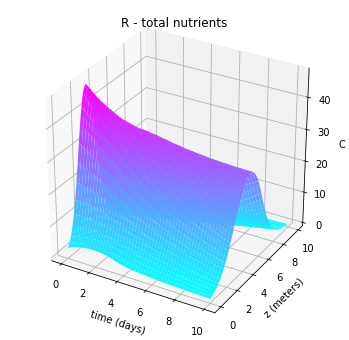

In [34]:
# 3D Visualize
#T,Z = np.meshgrid(time_steps,z_grid)
days = np.linspace(0,tmax,Nt)
T,Z = np.meshgrid(days,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T,Z, R, cmap='cool')
ax.set_xlabel('time (days)')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('R - total nutrients')

In [33]:
pd.DataFrame(R).sum(axis=0) + Rs

0       1193.5563
1       1193.7858
2       1193.7861
3       1193.7865
4       1193.7869
           ...   
59994   1192.2717
59995   1192.2716
59996   1192.2716
59997   1192.2715
59998   1192.2714
Length: 59999, dtype: float64

## Checking Nutrient Total Remains Constant

array([[32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [32.2,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

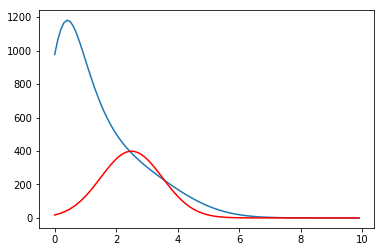

In [94]:
# Visualize Shift
plt.plot(z_grid,A[:,-1])
plt.plot(z_grid,A[:,0],color = 'r')

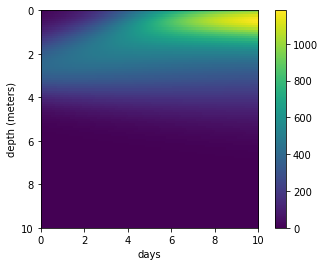

In [95]:
# Heatmap
plt.imshow(A[:,:],aspect=tmax/zmax,origin="lower",extent=(0,tmax,0,zmax))
plt.xlabel('days')
plt.ylabel('depth (meters)')
plt.gca().invert_yaxis()
plt.colorbar()